In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [6]:
df = pd.read_csv(r"/content/heart_v2.csv")
df.columns
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            270 non-null    int64
 1   sex            270 non-null    int64
 2   BP             270 non-null    int64
 3   cholestrol     270 non-null    int64
 4   heart disease  270 non-null    int64
dtypes: int64(5)
memory usage: 10.7 KB


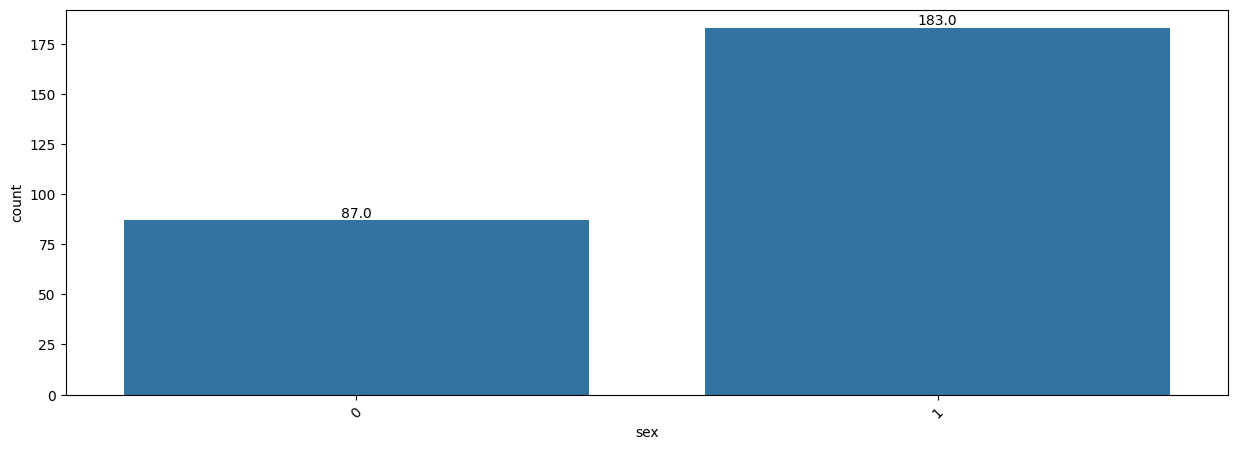

In [11]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x='sex',data=df)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')
plt.xticks(rotation=45)

plt.show()

In [14]:
df['sex'].value_counts()

,count
sex,
1,183
0,87


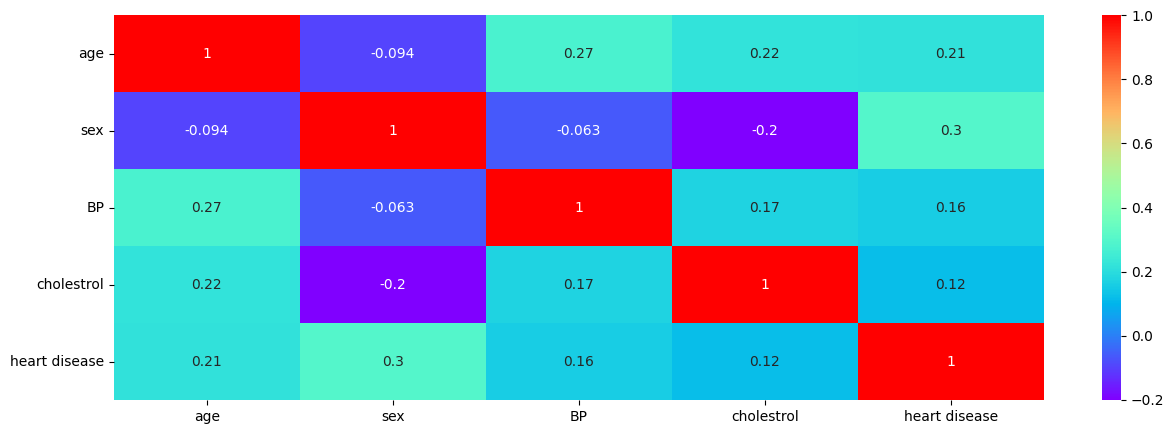

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(df.corr(),annot=True,cmap="rainbow")
plt.show()

In [17]:
X = df.drop('heart disease',axis=1)
y = df['heart disease']


In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(max_depth = 3)
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'age <= 54.5\ngini = 0.497\nsamples = 216\nvalue = [117.0, 99.0]\nclass = No Disease'),
 Text(0.25, 0.625, 'sex <= 0.5\ngini = 0.423\nsamples = 102\nvalue = [71.0, 31.0]\nclass = No Disease'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'cholestrol <= 300.0\ngini = 0.077\nsamples = 25\nvalue = [24, 1]\nclass = No Disease'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 23\nvalue = [23, 0]\nclass = No Disease'),
 Text(0.1875, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No Disease'),
 Text(0.375, 0.375, 'cholestrol <= 273.5\ngini = 0.476\nsamples = 77\nvalue = [47, 30]\nclass = No Disease'),
 Text(0.3125, 0.125, 'gini = 0.441\nsamples = 61\nvalue = [41, 20]\nclass = No Disease'),
 Text(0.4375, 0.125, 'gini = 0.469\nsamples = 16\nvalue = [6, 10]\nclass = Disease'),
 Text(0.75, 0.625, 'sex <= 0.5\ngini = 0.481\nsamples = 114\nvalue = [46, 68]\nclass = Disease'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'BP <= 142.5\ngini = 0.469\nsamples = 40\nv

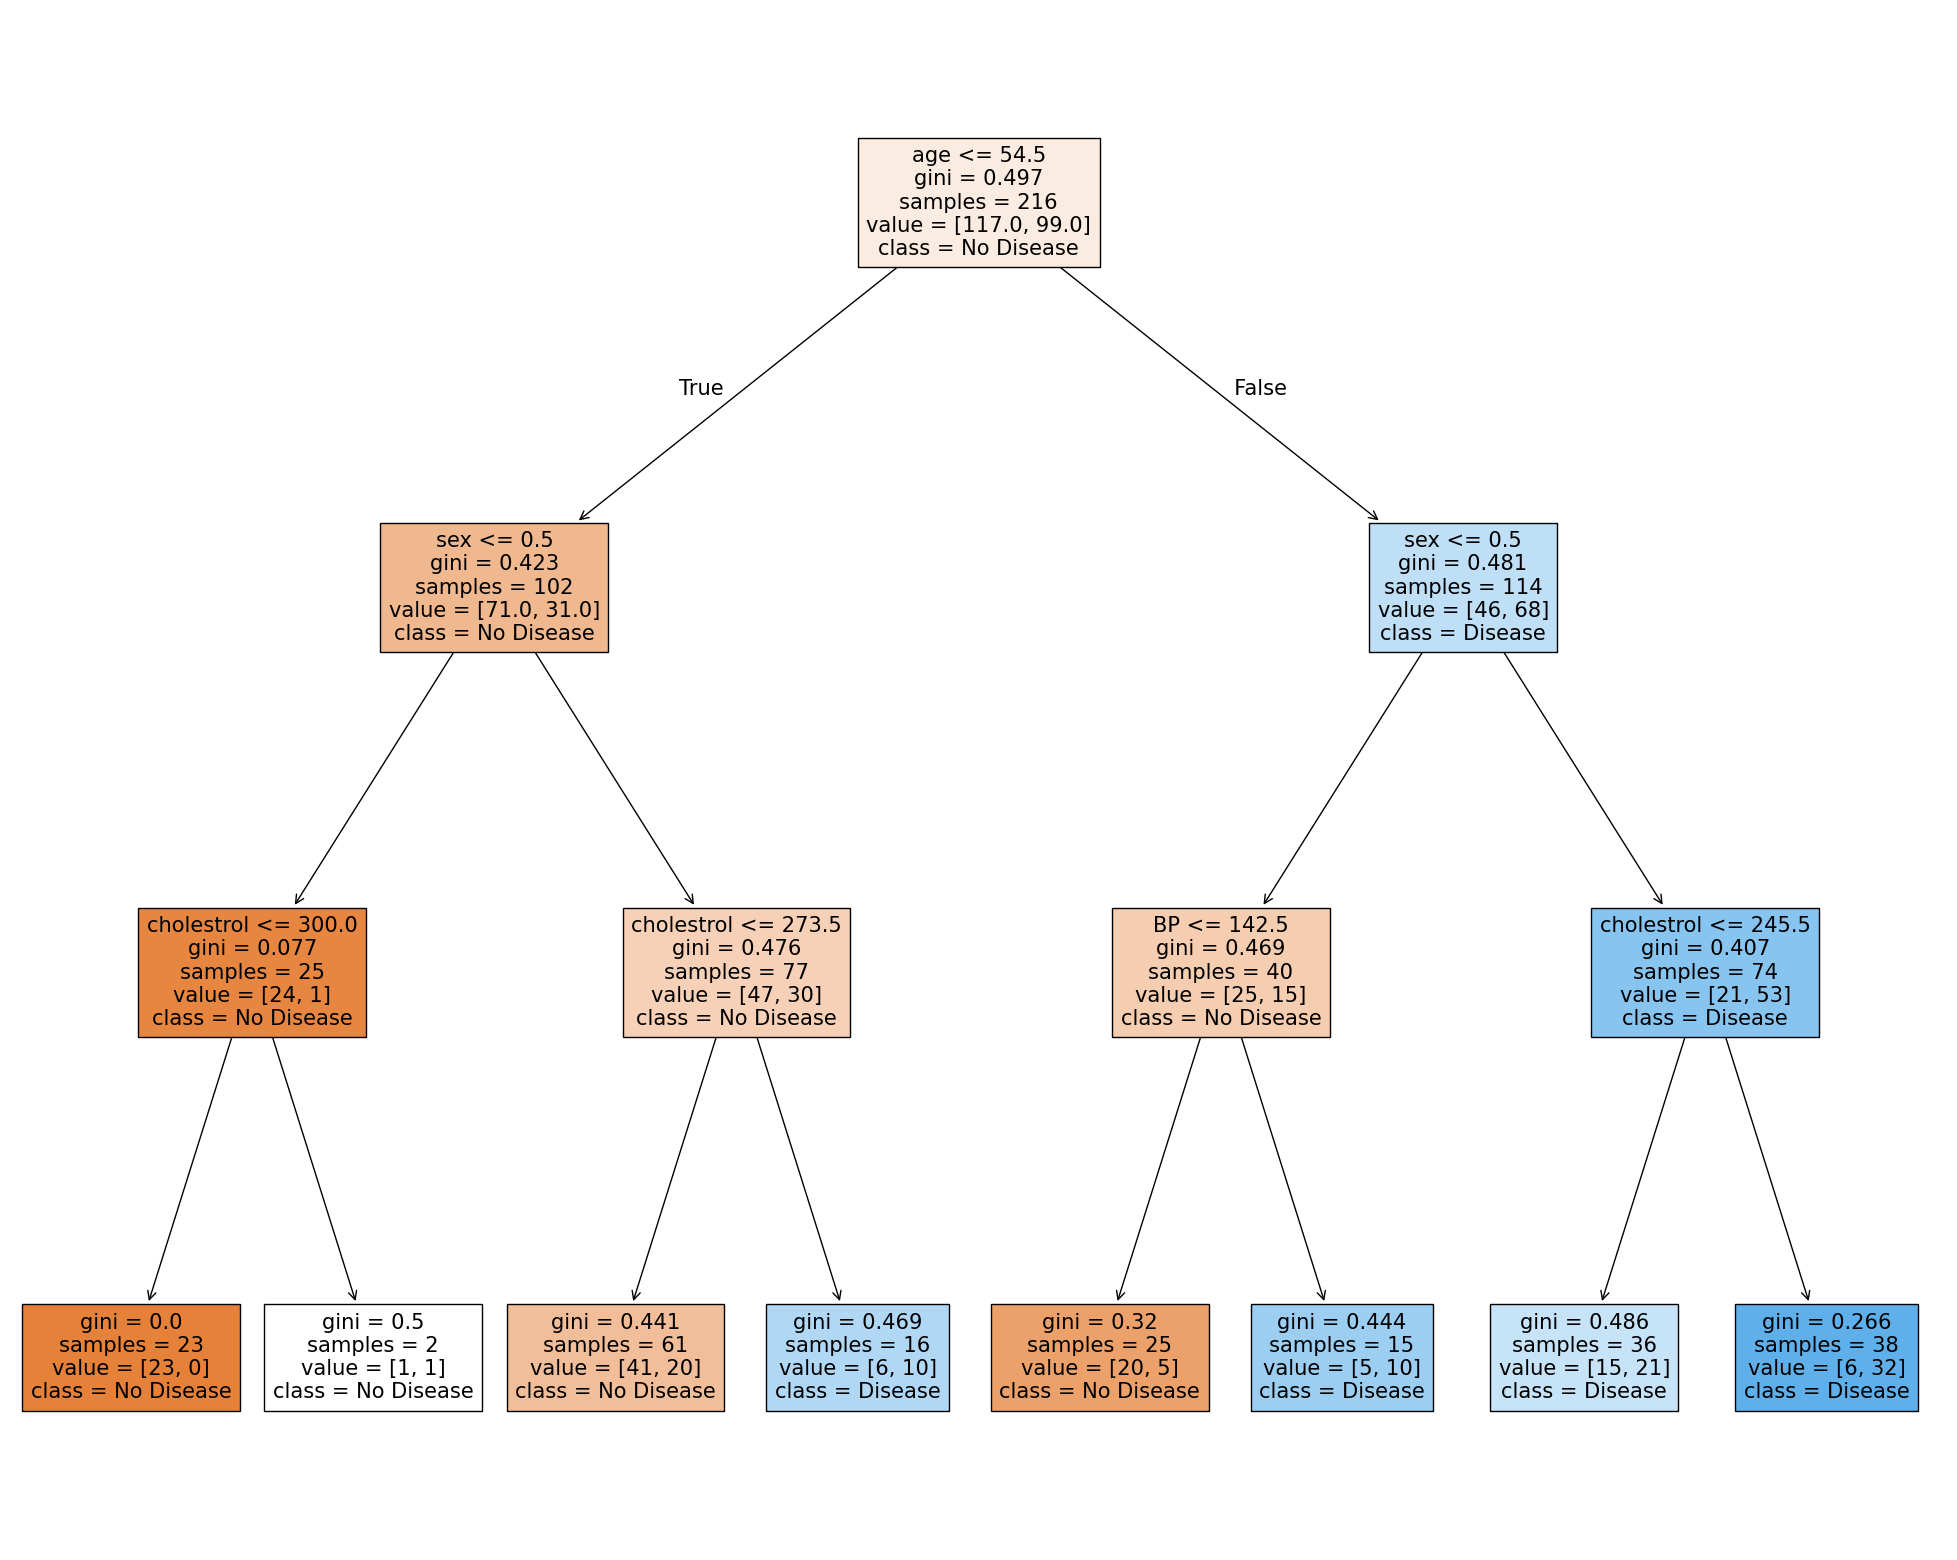

In [20]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(dt,feature_names=X.columns,class_names=['No Disease','Disease'],
               filled=True)

In [21]:
from sklearn.metrics import confusion_matrix,accuracy_score
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6296296296296297

In [23]:
#Hyper parameter tuning
from sklearn.model_selection import GridSearchCV

params = {
    "max_depth":[2,3,5,10,20],
    "min_samples_leaf":[5,10,20,50,100,200],
    "min_samples_split":[2,5,10,15,30,50,75],
    "criterion":["gini","entropy"]
}



grid_search = GridSearchCV(estimator=dt,param_grid=params,cv=4,n_jobs=-1,verbose=1,scoring="accuracy")
grid_search.fit(X_train,y_train)


Fitting 4 folds for each of 420 candidates, totalling 1680 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'min_samples_split': [2, 5, 10, 15, 30, 50, 75]},
             scoring='accuracy', verbose=1)

In [24]:
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 420 candidates, totalling 1680 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(max_depth=3), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'min_samples_split': [2, 5, 10, 15, 30, 50, 75]},
             scoring='accuracy', verbose=1)

In [25]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 10,
 'min_samples_split': 2}

In [26]:
dt = DecisionTreeClassifier(max_depth = 3,criterion='gini',min_samples_leaf=10,min_samples_split=2)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.6296296296296297

In [27]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.5740740740740741

In [28]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
accuracy_score(y_test,y_pred)

0.7037037037037037

In [30]:
270*0.80

216.0

In [31]:
216-270

-54

In [32]:
 54*0.75

40.5